<a href="https://colab.research.google.com/github/Abhi-008-sh/MLGLab/blob/main/1BM22CS008_Lab_9_adaboost_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race     sex  capital.gain  \
0                  ?  Not-in-family  White  Female             0   
1    Exec-managerial  Not-in-family  White  Female             0   
2                  ?      Unmarried  Black  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   

   capital.loss  hours.per.week native.country income  
0          4356              40  United-States  <=50K  
1          4356              18  United-States

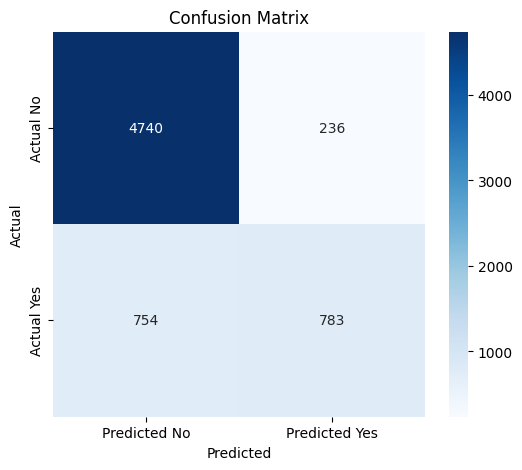

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# url = "https://www.kaggle.com/datasets/uciml/adult-census-income"
df = pd.read_csv('/content/income.csv')

# Show the first few rows of the dataset
print(df.head())

# Preprocess the data
# Handling missing values: Drop rows with missing values
df.dropna(inplace=True)

# Encoding categorical features using LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop('income', axis=1)  # Drop the target column
y = df['income']  # Target column

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an AdaBoost model using a decision tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Using a simple decision stump
ada_boost_model = AdaBoostClassifier(
    estimator=base_estimator, n_estimators=50, random_state=42)

# Fit the model on the training data
ada_boost_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ada_boost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display accuracy score
print(f"Accuracy Score: {accuracy:.4f}")

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Try different base classifiers and parameters ---
results = []

# Parameters to experiment with
n_estimators_list = [10, 50, 100]
learning_rates = [0.01, 0.1, 1]

# DecisionTreeClassifier as base estimator
for n in n_estimators_list:
    for lr in learning_rates:
        tree_base = DecisionTreeClassifier(max_depth=1)
        model = AdaBoostClassifier(estimator=tree_base, n_estimators=n, learning_rate=lr, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'Base': 'DecisionTree',
            'n_estimators': n,
            'learning_rate': lr,
            'Accuracy': acc
        })

# LogisticRegression as base estimator
for n in n_estimators_list:
    for lr in learning_rates:
        log_reg_base = LogisticRegression(max_iter=1000)
        model = AdaBoostClassifier(estimator=log_reg_base, n_estimators=n, learning_rate=lr, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'Base': 'LogisticRegression',
            'n_estimators': n,
            'learning_rate': lr,
            'Accuracy': acc
        })

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results)
print(results_df)

# Optional: Visualize the result
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='n_estimators', y='Accuracy', hue='Base', data=results_df, ci=None)
plt.title('AdaBoost Accuracy with Different Estimators and n_estimators')
plt.show()

Accuracy: 0.8659217877094972
Confusion Matrix:
[[ 26   0  17]
 [  0  12   5]
 [  2   0 117]]
